## Praktikum Bersama

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import LIbrary

In [ ]:
import numpy as np
import pandas as pd

# Import data dan model dari scikit-learn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import library untuk visualisasi
import matplotlib.pyplot as plt
# Import Axes3D untuk 3D plot (perlu diimpor secara eksplisit dari matplotlib)
from mpl_toolkits.mplot3d import Axes3D

# Agar plot tampil rapi
plt.rcParams['figure.figsize'] = (8, 6)

In [ ]:
# Muat dataset Wine
wine = load_wine()

# Buat DataFrame dari data (fitur) dan gunakan nama kolom yang disediakan
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Tambahkan kolom 'target' (label kelas)
df['target'] = wine.target

# Tampilkan 5 baris pertama untuk verifikasi
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
# Statistik Deskriptif
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# Cek missing value
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [ ]:
# Cek data duplicated
df.duplicated().sum()

np.int64(0)

In [ ]:
# Distribusi kelas target
print("Nama kelas:", wine. target_names)
df['target' ].value_counts ()

Nama kelas: ['class_0' 'class_1' 'class_2']


,count
target,
1,71
0,59
2,48


Pemisahan Fitur dan Label

In [ ]:
# Ekstraksi fitur (data) dan label (target) dari objek 'wine'
X = wine.data
y = wine.target

# Tampilkan dimensi (shape) dari array fitur dan label
print(f"Shape X (Fitur): {X.shape}") # Output: (178, 13)
print(f"Shape y (Label): {y.shape}") # Output: (178,)

Shape X (Fitur): (178, 13)
Shape y (Label): (178,)


Pembagian Data Latih dan Data Uji (Train-Test Split)

In [ ]:
from sklearn.model_selection import train_test_split # Sudah diimpor di awal, ini hanya pengingat

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Menampilkan dimensi (shape) dari set pelatihan dan pengujian
print(f"Shape X_train (Fitur Pelatihan): {X_train.shape}")
print(f"Shape X_test (Fitur Pengujian) : {X_test.shape}")

Shape X_train (Fitur Pelatihan): (142, 13)
Shape X_test (Fitur Pengujian) : (36, 13)


In [ ]:
# Standardisasi (mean=0, std=1)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 0.38580089, -0.63787118,  1.77666817, -1.22453161,  0.69643032,
         0.52686525,  0.73229212, -0.1695489 , -0.41578344, -0.16746725,
         0.62437819,  0.2529082 ,  0.46772474],
       [ 0.94851892, -0.76544542,  1.25317383,  0.85328406,  0.09178497,
         1.17279546,  1.33318146, -0.59045701,  1.34974202,  0.30530313,
         1.06715537,  0.15104809,  1.81576773],
       [ 0.52335419, -0.51940939,  0.9540342 , -1.04643312, -0.44567755,
         0.93057163,  1.006382  , -0.1695489 , -0.26000178, -0.081509  ,
        -0.12834302,  0.89317174,  1.51620262],
       [ 0.97352861, -0.55585917,  0.16879269, -1.0761162 , -0.71440882,
         0.52686525,  0.81662747, -0.59045701,  0.36312485,  0.262324  ,
         0.8900445 ,  0.42752553,  1.93226527],
       [ 0.43582027,  0.82012009,  0.05661533,  0.55645325, -0.51286037,
        -0.55506784, -1.29175618,  0.75644894, -0.60618325,  1.47433535,
        -1.76661859, -1.43505932, -0.29783054]])

Penerapan Model SVM tanpa PCA (Baseline Model)

In [ ]:
# Model SVM tanpa PCA
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi SVM tanpa PCA:", acc_no_pca)

print("\nClassification Report (tanpa PCA):")
print(classification_report(y_test, y_pred_no_pca, target_names=wine.target_names))

Akurasi SVM tanpa PCA: 0.9722222222222222

Classification Report (tanpa PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



Penerapan PCA (Principal Component Analysis)

In [ ]:
# PCA dengan 3 komponen utama
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca. transform(X_test_scaled)

print("Shape X_train_pca:", X_train_pca. shape)
print("Shape X_test_pca :", X_test_pca.shape)

# (n_train, 3)
# (n_test, 3)

Shape X_train_pca: (142, 3)
Shape X_test_pca : (36, 3)


Menampilkan Variansi yang Dijelaskan oleh Setiap Komponen PCA

In [ ]:
# Variansi yang dijelaskan oleh tiap komponen
explained_var = pca.explained_variance_ratio_
print("Explained Variance Ratio tiap komponen:", explained_var)
print("Total variansi yang dijelaskan 3 komponen pertama:", explained_var.sum())

Explained Variance Ratio tiap komponen: [0.35792104 0.19270671 0.11019835]
Total variansi yang dijelaskan 3 komponen pertama: 0.6608261082211259


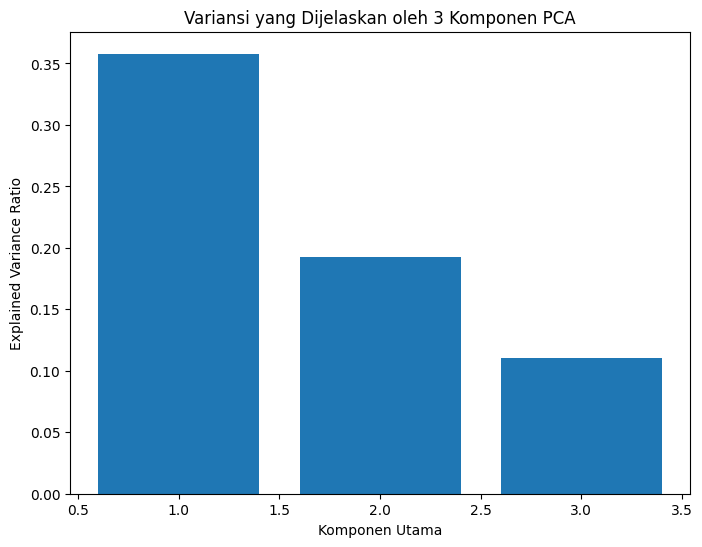

In [ ]:
plt.bar([1, 2, 3], explained_var)
plt.xlabel('Komponen Utama' )
plt.ylabel('Explained Variance Ratio' )
plt.title('Variansi yang Dijelaskan oleh 3 Komponen PCA' )
plt.show()

Membangun Model SVM dengan PCA

In [ ]:
# Model SVM dengan PCA
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Prediksi dan evaluasi
y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA (3 komponen):", acc_pca)

print("\nClassification Report (dengan PCA):")
print(classification_report(y_test, y_pred_pca, target_names=wine.target_names) )

Akurasi SVM dengan PCA (3 komponen): 0.9722222222222222

Classification Report (dengan PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



Visualisasi PCA dalam Ruang 3 Dimensi

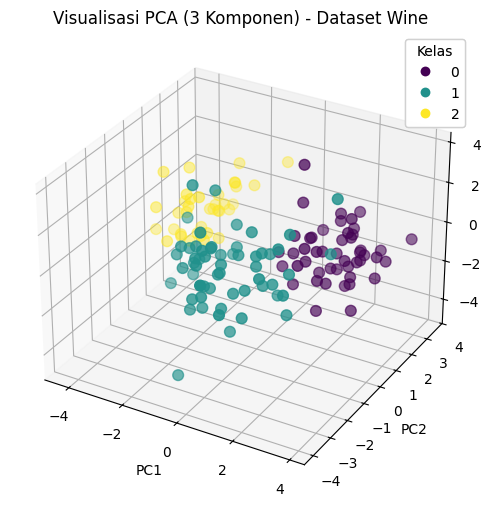

In [ ]:
# Visualisasi 3D PCA (menggunakan data train)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=y_train,
    s=60
)

ax.set_title('Visualisasi PCA (3 Komponen) - Dataset Wine')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Tambahkan legend berdasarkan kelas
legend1 = ax.legend(
    *scatter.legend_elements(),
    title="Kelas"
)
ax.add_artist(legend1)

plt.show()

Perbandingan Model SVM Tanpa PCA dan Dengan PCA

In [ ]:
comparison = pd.DataFrame({
    'Model': ['SVM Tanpa PCA', 'SVM Dengan PCA (3 Komponen)'],
    'Jumlah Fitur': [X_train_scaled.shape[1], X_train_pca.shape[1]],
    'Akurasi': [acc_no_pca, acc_pca],
    'Variansi Total PCA': [None, explained_var.sum()]
})

comparison

,Model,Jumlah Fitur,Akurasi,Variansi Total PCA
0,SVM Tanpa PCA,13,0.972222,NaN
1,SVM Dengan PCA (3 Komponen),3,0.972222,0.660826


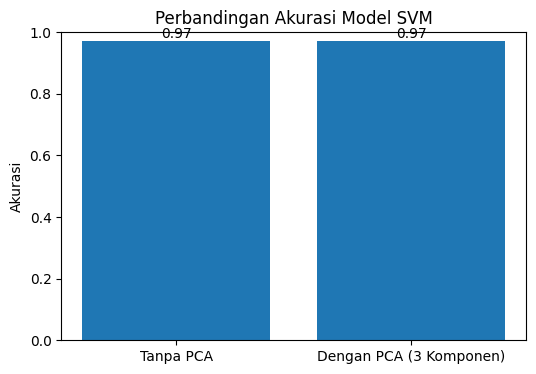

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Tanpa PCA', 'Dengan PCA (3 Komponen)'], [acc_no_pca, acc_pca])
plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)

# Menambahkan label akurasi di atas setiap bar
for i, v in enumerate([acc_no_pca, acc_pca]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()

## Praktikum Mandiri

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

Baca Dataset

In [33]:
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum12/data/data.csv')
df.head()

# KRITIKAL: Hapus kolom 'id' dan 'Unnamed: 32' (kosong/bermasalah)
df = df.drop(columns=['id', 'Unnamed: 32'])

print(f"Bentuk Dataset setelah penghapusan kolom: {df.shape}")

Bentuk Dataset setelah penghapusan kolom: (569, 31)


EDA & Encoding Label

In [34]:
df.info()

# Mengubah label diagnosis dari kategori (M/B) menjadi numerik (1/0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("\nDistribusi Kelas Target ('diagnosis'):")
print(df['diagnosis'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Pemisahan Fitur, Label & Penanganan Nilai Hilang

In [35]:
# Pisahkan X dan y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Penanganan Nilai Hilang (Imputasi Mean)
imputer = SimpleImputer(strategy='mean')
X_imputed_array = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed_array, columns=X.columns)

# KRITIKAL: Reset indeks X dan y agar sinkron saat Train-Test Split
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

print(f"\nTahap 4: Pemisahan dan Imputasi selesai. X.shape: {X.shape}, y.shape: {y.shape}")


Tahap 4: Pemisahan dan Imputasi selesai. X.shape: (569, 30), y.shape: (569,)


Pembagian Data Latih, Data Uji & Standardisasi

In [36]:
# Pembagian Data (stratify=y harusnya bekerja sekarang karena indeks sudah di-reset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nBentuk X_train_scaled: {X_train_scaled.shape}")
print("Tahap 5: Data sudah terbagi dan ter-standardisasi.")


Bentuk X_train_scaled: (455, 30)
Tahap 5: Data sudah terbagi dan ter-standardisasi.


Penerapan Model SVM tanpa PCA (Baseline Model)

In [37]:
# Latih Model
svm_baseline = SVC(kernel='rbf', random_state=42)
svm_baseline.fit(X_train_scaled, y_train)

# Prediksi dan Evaluasi
y_pred_baseline = svm_baseline.predict(X_test_scaled)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print("\n--- Evaluasi Model SVM (Tanpa PCA / Baseline) ---")
print(f"Akurasi Baseline: {accuracy_baseline:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))


--- Evaluasi Model SVM (Tanpa PCA / Baseline) ---
Akurasi Baseline: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Penerapan PCA (Principal Component Analysis)

In [38]:
# 7. PENERAPAN PCA (Principal Component Analysis)

pca = PCA(n_components=None) # Ambil semua komponen
X_train_pca_full = pca.fit_transform(X_train_scaled)
X_test_pca_full = pca.transform(X_test_scaled)

print(f"Bentuk X_train setelah PCA (semua komponen): {X_train_pca_full.shape}")
print("Tahap 7: PCA telah diterapkan.")

Bentuk X_train setelah PCA (semua komponen): (455, 30)
Tahap 7: PCA telah diterapkan.


Menampilkan Variansi yang Dijelaskan oleh Setiap Komponen PCA (Visualisasi)

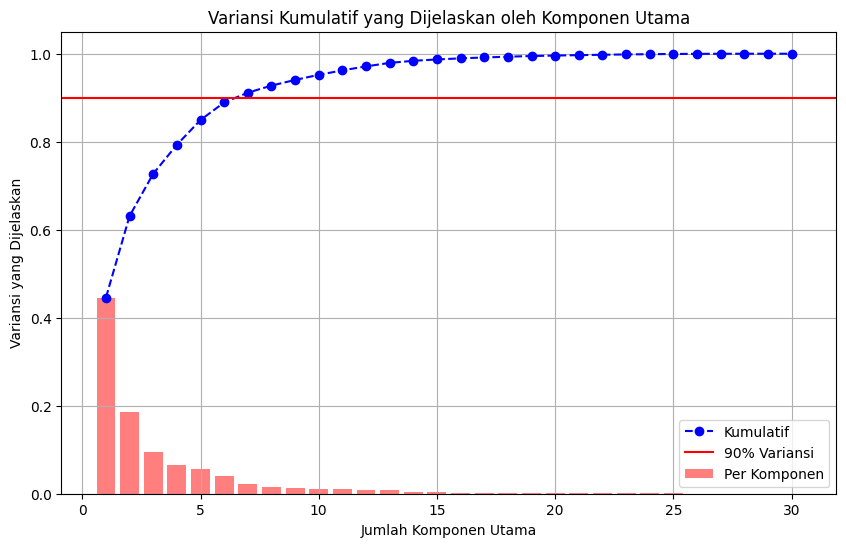


Jumlah Komponen optimal (>= 90% variansi): 7


In [40]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='blue', label='Kumulatif')
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, color='red', label='Per Komponen')
plt.title('Variansi Kumulatif yang Dijelaskan oleh Komponen Utama')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Variansi yang Dijelaskan')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Variansi')
plt.grid(True)
plt.legend()
plt.show()


# Tentukan jumlah komponen optimal (misal: menjelaskan >= 90% variansi)
n_components_opt = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f"\nJumlah Komponen optimal (>= 90% variansi): {n_components_opt}")

# Ambil data dengan komponen optimal
pca_final = PCA(n_components=n_components_opt)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

Membangun Model SVM dengan PCA

In [41]:
svm_pca = SVC(kernel='rbf', random_state=42)
svm_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("\n--- Evaluasi Model SVM (Dengan PCA) ---")
print(f"Akurasi Dengan PCA: {accuracy_pca:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))


--- Evaluasi Model SVM (Dengan PCA) ---
Akurasi Dengan PCA: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Visualisasi PCA dalam Ruang 3 Dimensi

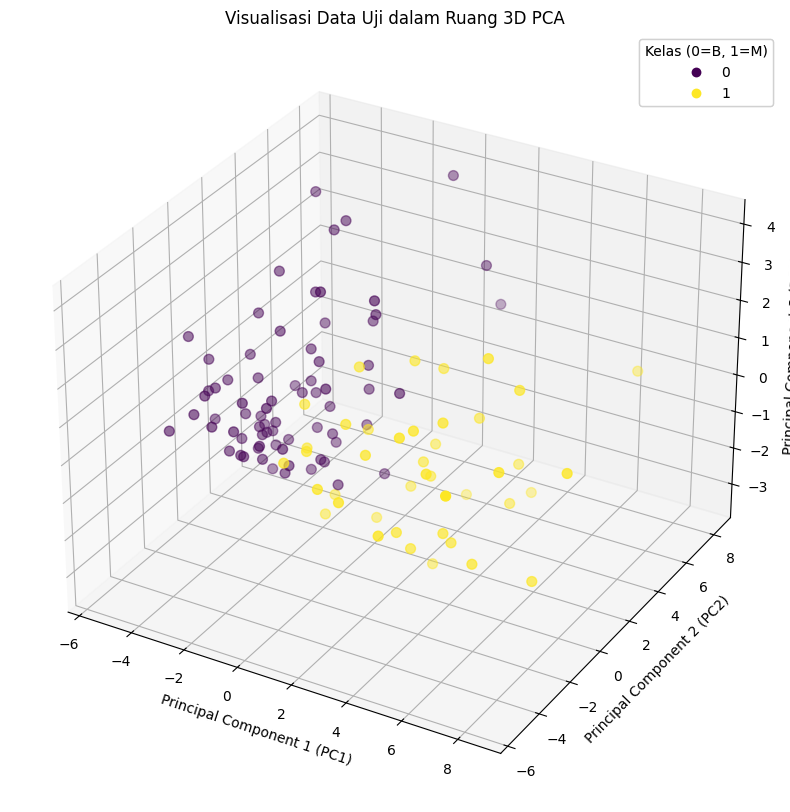

In [42]:
if X_test_pca_full.shape[1] >= 3:
    # Ambil 3 komponen pertama
    X_3d = X_test_pca_full[:, :3]

    df_3d = pd.DataFrame(data=X_3d, columns=['PC1', 'PC2', 'PC3'])
    df_3d['Label'] = y_test.values

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df_3d['PC1'], df_3d['PC2'], df_3d['PC3'], c=df_3d['Label'], cmap='viridis', s=50)

    ax.set_xlabel('Principal Component 1 (PC1)')
    ax.set_ylabel('Principal Component 2 (PC2)')
    ax.set_zlabel('Principal Component 3 (PC3)')
    ax.set_title('Visualisasi Data Uji dalam Ruang 3D PCA')

    legend1 = ax.legend(*scatter.legend_elements(), title="Kelas (0=B, 1=M)")
    ax.add_artist(legend1)
    plt.show()
else:
    print("\nTidak dapat melakukan visualisasi PCA 3D.")

Perbandingan Model SVM Tanpa PCA dan Dengan PCA (Visualisasi)

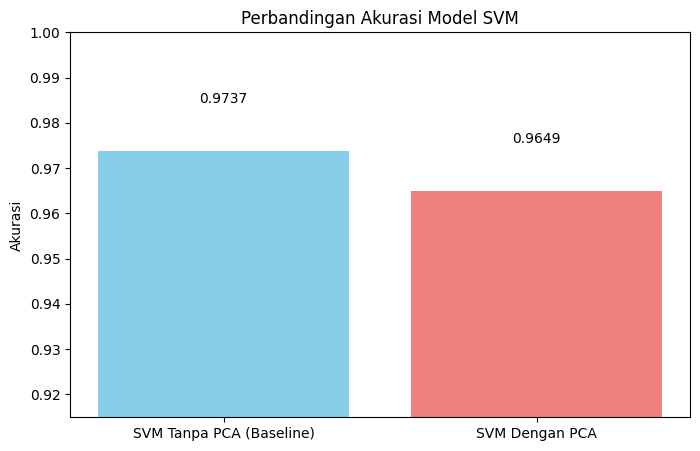


--- Ringkasan Akhir ---
Akurasi SVM Tanpa PCA: 0.9737
Akurasi SVM Dengan PCA: 0.9649


In [44]:
models = ['SVM Tanpa PCA (Baseline)', 'SVM Dengan PCA']
accuracies = [accuracy_baseline, accuracy_pca]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.ylim(min(accuracies) - 0.05, 1.0)
plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')

# Menampilkan nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.show()


print("\n--- Ringkasan Akhir ---")
print(f"Akurasi SVM Tanpa PCA: {accuracy_baseline:.4f}")
print(f"Akurasi SVM Dengan PCA: {accuracy_pca:.4f}")